In [42]:
import json
import csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [8]:
def jsonToDict(fileName):
    with open(fileName) as json_file: 
        return json.load(json_file) 

In [23]:
def writeCSV(data, fileName):
    with open(f"{fileName}.csv", 'w') as csv_file:  
        writer = csv.writer(csv_file)
        for key, value in data.items():
           writer.writerow([value, key])

In [9]:
collated_data = jsonToDict("collatedData.json")
courseAreaDegrees = jsonToDict("courseAreaDegrees.json")

In [10]:
print(collated_data)

{'c10026': {'name': 'Bachelor of Business', 'subjects': {'core': {'26100': {'name': 'Integrating Business Perspectives'}, '22107': {'name': 'Accounting for Business Decisions A'}, '23115': {'name': 'Economics for Business'}, '26134': {'name': 'Business Statistics'}, '22207': {'name': 'Accounting for Business Decisions B'}, '21129': {'name': 'Managing People and Organisations'}, '24108': {'name': 'Marketing Foundations'}, '25300': {'name': 'Fundamentals of Business Finance'}, '22420': {'name': 'Accounting Standards and Regulations'}, '22321': {'name': 'Cost Management Systems'}, '22320': {'name': 'Accounting for Business Combinations'}, '22522': {'name': 'Assurance Services and Audit'}, '79017': {'name': 'Taxation Law'}, '22421': {'name': 'Management Decisions and Control'}, '22319': {'name': 'Financial Statement Analysis (Capstone)'}, '21036': {'name': 'Managing Strategic Performance'}, '21407': {'name': 'Strategic Human Resource Management'}, '21037': {'name': 'Managing Employee Relat

In [14]:
print("Number of course areas:", len(courseAreaDegrees))
print("Number of degrees:", len(collated_data))

Number of course areas: 14
Number of degrees: 176


In [19]:
numSubjects = 0
numElectives = 0

for degree in collated_data:
    numSubjects += len(collated_data[degree]["subjects"]["core"])
    majorTypes = ["major", "sub-major", "stream"]
    
    for majorType in majorTypes:
        numSubjects += len(collated_data[degree]["subjects"][majorType]["core"])
        numSubjects += len(collated_data[degree]["subjects"][majorType]["elective"])
        
        numElectives += len(collated_data[degree]["subjects"][majorType]["core"])
        numElectives += len(collated_data[degree]["subjects"][majorType]["elective"])

        
print(numSubjects)
print(numElectives)

5932
820


In [24]:
# writeCSV(courseAreaDegrees, "courseAreaDegrees")

['Analytics and Data Science', 'Business', 'Communication', 'Creative Intelligence and Innovation', 'Design, Architecture and Building', 'Education', 'Engineering', 'Health', 'UTS: Health (GEM)', 'Information Technology', 'International Studies', 'Law', 'Science', 'Transdisciplinary Innovation']
[0, 55, 0, 53, 73, 12, 34, 0, 0, 27, 0, 66, 99, 2]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


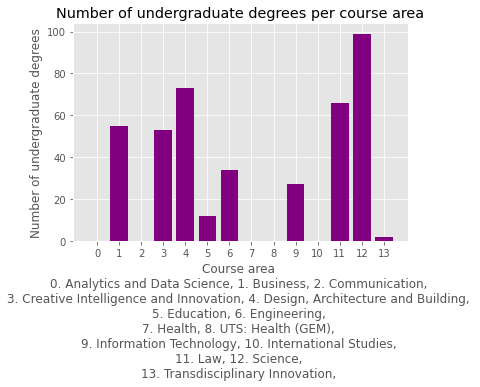

In [52]:
x_courseAreas = [courseArea for courseArea in courseAreaDegrees]
y_numDegrees = [len(courseAreaDegrees[courseArea]) for courseArea in courseAreaDegrees]

print(x_courseAreas)
print(y_numDegrees)
x_pos = [i for i, _ in enumerate(x_courseAreas)]
print(x_pos)

labels = ""

for i, courseArea in enumerate(x_courseAreas):
    newLine = "\n" if i%2 == 0 and i != 0 else ""
    labels += f"{i}. {courseArea}, {newLine}"

plt.bar(x_courseAreas, y_numDegrees, color='purple')
plt.xlabel(f"Course area \n{labels}")
plt.ylabel("Number of undergraduate degrees")
plt.title("Number of undergraduate degrees per course area")

plt.xticks(x_courseAreas, x_pos)

plt.show()